# LOAD THE DATASET FROM ROBOFLOW


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Gz1FcPPYeSdLMPXCDP5E")
project = rf.workspace("fahad-5ql8c").project("food-waste-classification-4nr3s")
version = project.version(2)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Waste-Classification-2 in folder:: 100%|██████████| 311/311 [00:00<00:00, 6321.04it/s]


# LOADING YOLO MODEL


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.3 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt') # YOLOv8 Classification model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model.train(data = '/content/Food-Waste-Classification-2' , epochs = 100)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Food-Waste-Classification-2, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788d2c985be0>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('/content/runs/classify/train2')
speed: {'preprocess': 0.1222075384620124, 'inference': 0.6091330769230843, 'loss': 0.0004086923078935237, 'postprocess': 0.0005231153859487956}
task: 'classify'
top1: 1.0
top5: 1.0

# VALIDATE THE MODEL RESULTS


image 1/1 /content/Food-Waste-Classification-2/train/Animal Feed/0dd6ef514d67962ebbdf871485254d00_t_jpeg.rf.0fff0fee82dfecc58351a3b3cdd52ad8.jpg: 224x224 Animal Feed 1.00, Compostable 0.00, Non-reusable 0.00, Edible 0.00, 7.9ms
Speed: 8.6ms preprocess, 7.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


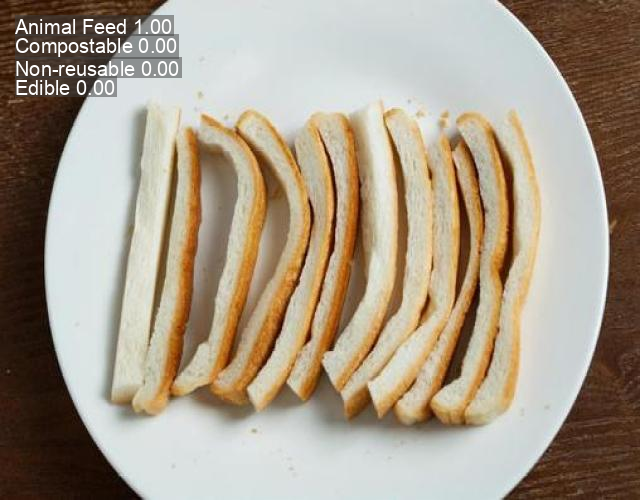

In [6]:
results = model.predict('/content/Food-Waste-Classification-2/train/Animal Feed/0dd6ef514d67962ebbdf871485254d00_t_jpeg.rf.0fff0fee82dfecc58351a3b3cdd52ad8.jpg')
results[0].show()


image 1/1 /content/Food-Waste-Classification-2/train/Compostable/109567208_avif.rf.392583b26e327418ce0e3096054cebcc.jpg: 224x224 Compostable 1.00, Non-reusable 0.00, Edible 0.00, Animal Feed 0.00, 3.9ms
Speed: 13.6ms preprocess, 3.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


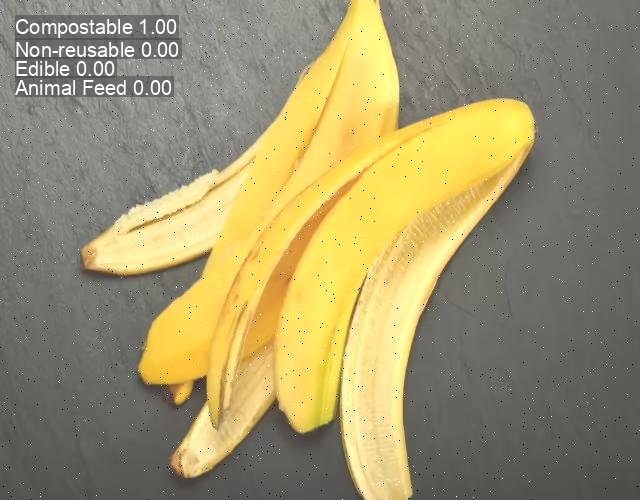

In [7]:
results = model.predict('/content/Food-Waste-Classification-2/train/Compostable/109567208_avif.rf.392583b26e327418ce0e3096054cebcc.jpg')
results[0].show()


image 1/1 /content/Food-Waste-Classification-2/train/Edible/36fc22ee-1e52-430b-ba5b-d8229470fea3_size3840_cropCenter_jpg.rf.0440eb93db9a6c784c6748fd803c6cae.jpg: 224x224 Edible 1.00, Compostable 0.00, Non-reusable 0.00, Animal Feed 0.00, 2.7ms
Speed: 4.9ms preprocess, 2.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


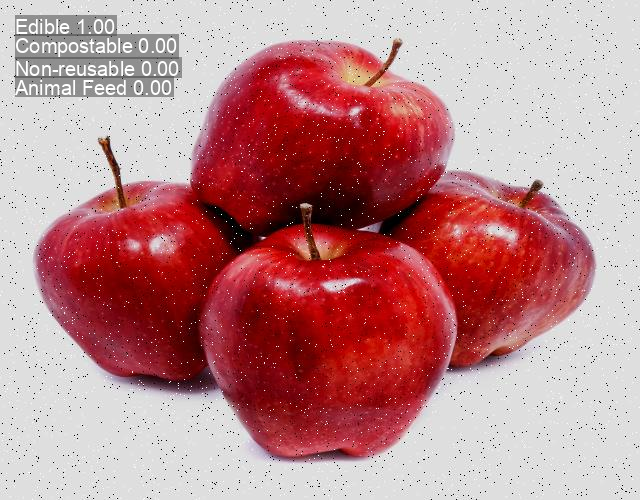

In [8]:
results = model.predict('/content/Food-Waste-Classification-2/train/Edible/36fc22ee-1e52-430b-ba5b-d8229470fea3_size3840_cropCenter_jpg.rf.0440eb93db9a6c784c6748fd803c6cae.jpg')
results[0].show()


image 1/1 /content/Food-Waste-Classification-2/train/Non-reusable/1800x1200_plastic_bottle_reuse_bigbeads_webp.rf.a6707d3bd9d9ac71ae90f5e91e9d4db9.jpg: 224x224 Non-reusable 1.00, Edible 0.00, Animal Feed 0.00, Compostable 0.00, 2.8ms
Speed: 4.5ms preprocess, 2.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


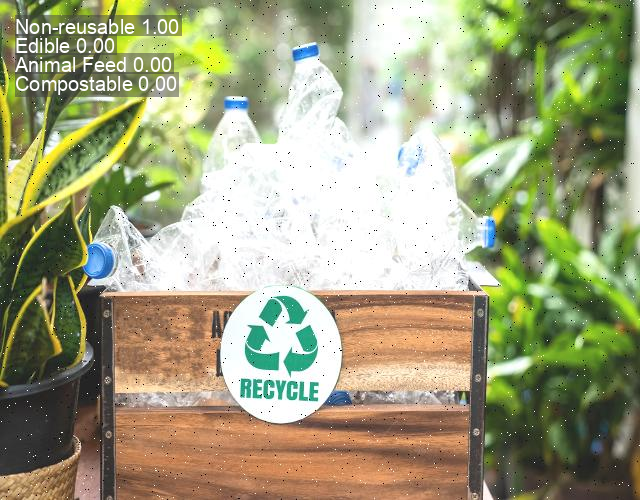

In [9]:
results = model.predict('/content/Food-Waste-Classification-2/train/Non-reusable/1800x1200_plastic_bottle_reuse_bigbeads_webp.rf.a6707d3bd9d9ac71ae90f5e91e9d4db9.jpg')
results[0].show()